Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 11.1 and Examples 11.13 and 11.23

Illustration of the mean, directional variance and principal component analysis of a random vector, using a two-dimensional Gaussian random vector\
Topics and relevant videos: [Mean of a random vector vector, covariance matrix](https://www.youtube.com/watch?v=olyVNcJknNg), [directional variance, principal component analysis](https://www.youtube.com/watch?v=hPM7F2CP9vQ)

Author: Carlos Fernandez-Granda

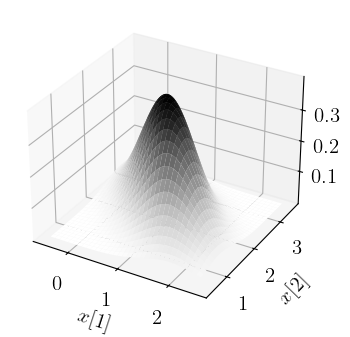

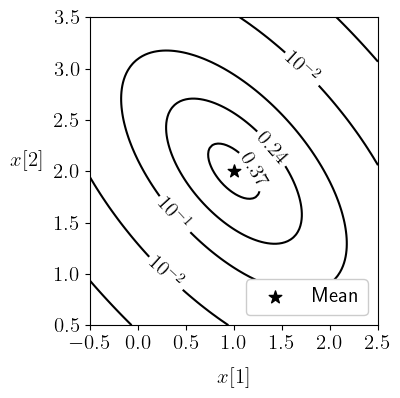

In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

font_size = 15
font_size_ticks = 15

x = np.linspace(-0.5, 2.5, 100)
y = np.linspace(0.5, 3.5, 100)


Sigma = np.array([[0.5,-0.3],[-0.3,0.5]])

def gaussian(x,y,mu_1,mu_2,Sigma):
    invSigma = np.linalg.inv(Sigma)
    return (np.exp(-(invSigma[0,0] * (x-mu_1)**2 + 2*invSigma[0,1]*(x-mu_1)*(y-mu_2) + invSigma[1,1] * (y-mu_2)**2)/2)
                  /(2 * np.pi * np.sqrt(np.linalg.det(Sigma))))
mu_1 = 1
mu_2 = 2
mu = np.array([mu_1,mu_2])

X, Y = np.meshgrid(x, y)
Z = gaussian(X, Y,mu_1,mu_2,Sigma)
c1=np.exp(-1/2)/(2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
level_list = [c1]
level_list_2 = [1e-10,1e-7,1e-4,1e-2,1e-1,0.37]

fig = plt.figure(figsize = (4,4)) 
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap='Greys',rasterized=True)#,vmin=0, vmax=0.08)
plt.xticks([0,1,2],fontsize=font_size_ticks) 
plt.yticks([1,2,3],fontsize=font_size_ticks)
ax.zaxis.set_tick_params(labelsize=font_size_ticks,pad=3)
plt.ylabel(r'$x[2]$',fontsize=font_size,labelpad = 5)
plt.xlabel(r'$x[1]$',fontsize=font_size,labelpad = 5)
plt.show()

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X, Y, Z, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X, Y, Z, levels = level_list_2,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.scatter(mu_1,mu_2, s=90, c="black", marker='*', edgecolor="black",label="Mean")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=20)
h.set_rotation(0)
plt.gcf().subplots_adjust(left=0.18)
plt.legend(fontsize=font_size,framealpha=1,loc = "lower right");

Covariance matrix [[ 0.5 -0.3]
 [-0.3  0.5]]
Direction [1. 0.]
Variance 0.5
Standard deviation 0.707
Mean 1.0


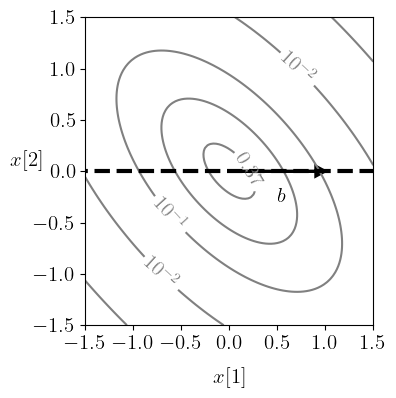

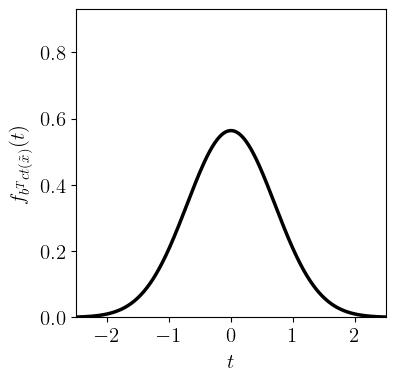

In [43]:
aux = np.array([1,0])
a = aux / np.linalg.norm(aux)

xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5

x_centered = np.linspace(xmin, xmax, 100)
y_centered = np.linspace(ymin, ymax, 100)

X_centered, Y_centered = np.meshgrid(x_centered, y_centered)
Z_centered = gaussian(X_centered, Y_centered,0,0,Sigma)

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
CS2 = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list_2,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.5,-0.3,r"$b$",fontsize=font_size)
plt.plot( [100 * a[0],-100 * a[0]], [100 * a[1], -100 * a[1]],'--',color='black',lw=3)# ,label=r"$b$")
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=5)
h.set_rotation(0)
plt.gcf().subplots_adjust(left=0.18)

print("Covariance matrix",Sigma)
var = a.T @ Sigma @ a
std = np.sqrt(var)
print("Direction",a)
print("Variance",np.round(var,3))
print("Standard deviation",np.round(std,3))
mean = a.T @ mu 
print("Mean",np.round(mean,3))

xmin_1d = -2.5
xmax_1d = 2.5
ymax_1d = 0.93
w = np.arange(xmin_1d,xmax_1d,1e-2)
plt.figure(figsize=(4,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(w,norm.pdf(w,0,std),lw=2.5,color="black")
plt.ylim([0,ymax_1d])
plt.xlim([xmin_1d,xmax_1d])
plt.ylabel(r'$f_{b^{T} ct(\tilde{x})} (t)$',fontsize=font_size,labelpad=5)
plt.xlabel('$t$',fontsize=font_size,labelpad=5);

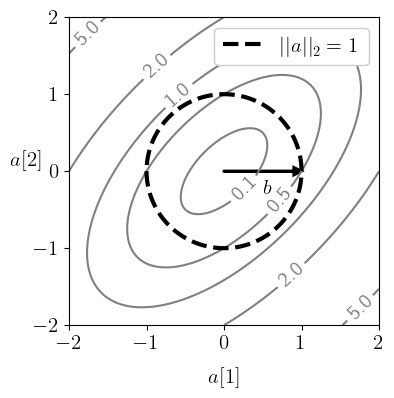

In [41]:
x_quadform = np.linspace(-2, 2, 100)
y_quadform = np.linspace(-2, 2, 100)
inds = np.arange(-np.pi,np.pi,1e-2)
tick_aux = np.arange(-2,3,1)

def quad_form(x,y):
    return Sigma[0,0] * x**2 + 2*Sigma[0,1]*x*y + Sigma[1,1] * y**2

X_quadform, Y_quadform = np.meshgrid(x_quadform, y_quadform)
Z_quadform = quad_form(X_quadform, Y_quadform)
level_list_quadform = [0.1,0.5,1,2,5]
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_quadform, Y_quadform, Z_quadform, levels=level_list_quadform,colors='gray')
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.1f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=3,label=r"$||a||_2=1$")
plt.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.5,-0.3,r"$b$",fontsize=font_size)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size,labelpad = 5)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size,labelpad = 10)
plt.legend(fontsize=font_size,framealpha=1);

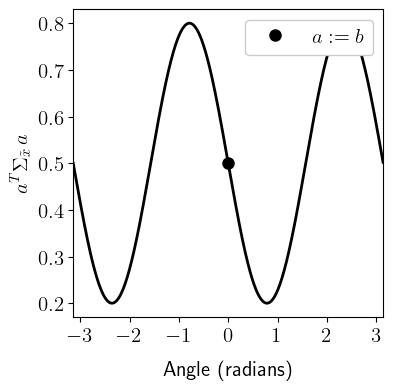

In [40]:
fig = plt.figure(figsize = (4,4)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(0,0.5,"o",markersize=8,color="black",label=r"$a:=b$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel("a[2]", fontsize=font_size)
h.set_rotation(0)
plt.xlabel("a[1]", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$a^T \Sigma_{\tilde{x}} \, a$", fontsize=font_size,labelpad=5)
h.set_rotation(90)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1,loc="upper right");

In [23]:
eigval,U = np.linalg.eig(Sigma)
u_1 = U[:,0]
u_2 = U[:,1]

Direction [ 0.70710678 -0.70710678]
Variance 0.8
Standard deviation 0.894


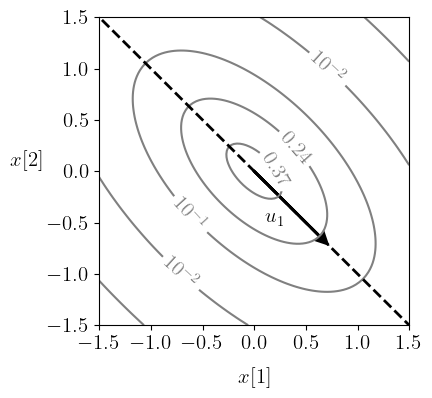

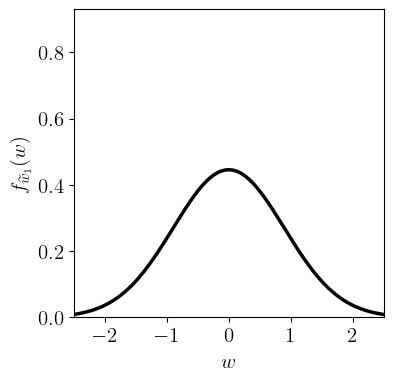

In [39]:
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list_2,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.plot( [100 * u_1[0],-100 * u_1[0]], [100 * u_1[1], -100 * u_1[1]],'--',color='black',lw=2)
plt.arrow(0, 0, u_1[0], u_1[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.1,-0.5,r"$u_1$",fontsize=font_size)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)

var = u_1.T @ Sigma @ u_1
std = np.sqrt(var)
print("Direction",u_1)
print("Variance",np.round(var,3))
print("Standard deviation",np.round(std,3))

plt.figure(figsize=(4,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(w,norm.pdf(w,0,std),lw=2.5,color="black")
plt.ylim([0,ymax_1d])
plt.xlim([xmin_1d,xmax_1d])
plt.ylabel(r'$f_{\widetilde{w}_1} (w)$',fontsize=font_size,labelpad=5)
plt.xlabel('$w$',fontsize=font_size,labelpad=5);

Direction [0.70710678 0.70710678]
Variance 0.2
Standard deviation 0.447


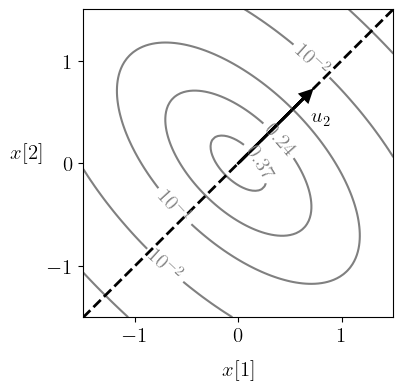

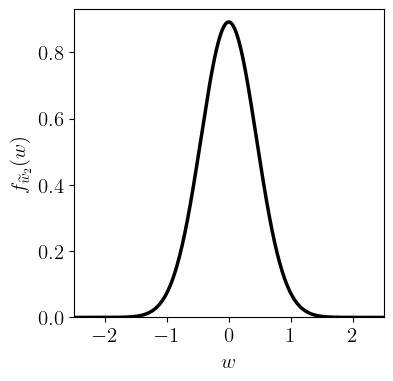

In [38]:
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X_centered, Y_centered, Z_centered, levels = level_list_2,colors='gray')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.plot( [100 * u_2[0],-100 * u_2[0]], [100 * u_2[1], -100 * u_2[1]],'--',color='black',lw=2)
plt.arrow(0, 0, u_2[0], u_2[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.7,0.4,r"$u_2$",fontsize=font_size)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)

var = u_2.T @ Sigma @ u_2
std = np.sqrt(var)
print("Direction",u_2)
print("Variance",np.round(var,3))
print("Standard deviation",np.round(std,3))

plt.figure(figsize=(4,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(w,norm.pdf(w,0,std),lw=2.5,color="black")
plt.ylim([0,ymax_1d])
plt.xlim([xmin_1d,xmax_1d])
plt.ylabel(r'$f_{\widetilde{w}_2} (w)$',fontsize=font_size,labelpad=5)
plt.xlabel('$w$',fontsize=font_size,labelpad=5);

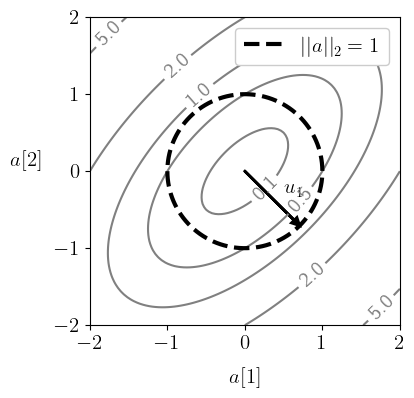

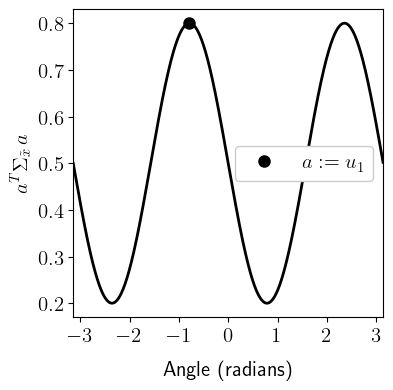

In [37]:
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_quadform, Y_quadform, Z_quadform, levels=level_list_quadform,colors='gray')
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.1f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=3,label=r"$||a||_2=1$")
plt.arrow(0, 0, u_1[0], u_1[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.5,-0.3,r"$u_1$",fontsize=font_size)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size,labelpad = 20)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size,labelpad = 10)
plt.legend(fontsize=font_size,framealpha=1)

fig = plt.figure(figsize = (4,4)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(np.arctan(u_1[1]/u_1[0]),eigval[0],"o",markersize=8,color="black",label=r"$a:=u_1$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel("a[2]", fontsize=font_size)
h.set_rotation(0)
plt.xlabel("a[1]", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$a^T \Sigma_{\tilde{x}} \, a$", fontsize=font_size,labelpad=5)
h.set_rotation(90)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1);

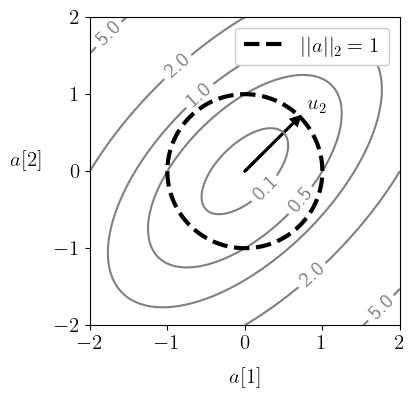

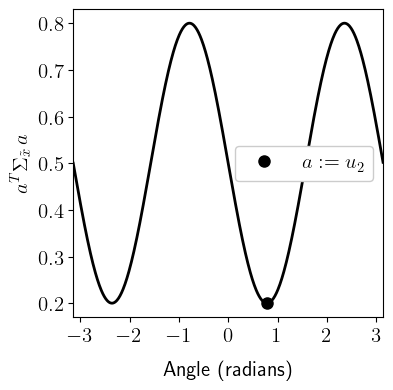

In [36]:
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_quadform, Y_quadform, Z_quadform, levels=level_list_quadform,colors='gray')
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.1f')#,ticks=Contourrange)
plt.plot(np.cos(inds),np.sin(inds),'--',color='black',lw=3,label=r"$||a||_2=1$")
plt.arrow(0, 0, u_2[0], u_2[1], head_width=0.1, head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
plt.text(0.8,0.8,r"$u_2$",fontsize=font_size)
plt.xticks(tick_aux,fontsize=font_size_ticks) 
plt.yticks(tick_aux,fontsize=font_size_ticks)
h = plt.ylabel(r"$a[2]$", fontsize=font_size,labelpad = 20)
h.set_rotation(0)
plt.xlabel(r"$a[1]$", fontsize=font_size,labelpad = 10)
plt.legend(fontsize=font_size,framealpha=1)

fig = plt.figure(figsize = (4,4)) 
plt.plot(inds,quad_form(np.cos(inds),np.sin(inds)),lw=2,color="black")
plt.plot(np.arctan(u_2[1]/u_2[0]),eigval[1],"o",markersize=8,color="black",label=r"$a:=u_2$")
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
h = plt.ylabel("a[2]", fontsize=font_size)
h.set_rotation(0)
plt.xlabel("a[1]", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$a^T \Sigma_{\tilde{x}} \, a$", fontsize=font_size,labelpad=5)
h.set_rotation(90)
plt.xlabel("Angle (radians)", fontsize=font_size)
plt.legend(fontsize=font_size,framealpha=1);

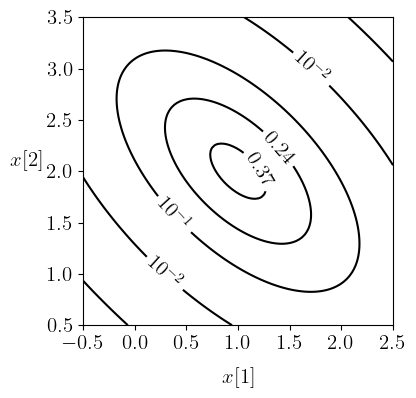

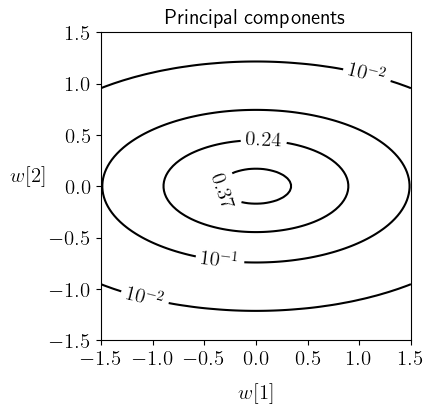

In [35]:
fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X, Y, Z, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X, Y, Z, levels = level_list_2,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)

Z_pcs = gaussian(X_centered, Y_centered,0,0,np.diag(eigval))

fig = plt.figure(figsize = (4,4)) 
CS = plt.contour(X_centered, Y_centered, Z_pcs, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X_centered, Y_centered, Z_pcs, levels = level_list_2,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$w[1]$", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$w[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)
plt.title("Principal components",fontsize=font_size);